Dataset URL: https://www.kaggle.com/datasets/warcoder/lumpy-skin-images-dataset
License(s): Attribution 4.0 International (CC BY 4.0)


In [2]:
!unzip -n lumpy-skin-images-dataset.zip

Archive:  lumpy-skin-images-dataset.zip
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_10.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_100.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_101.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_102.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_103.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_104.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_105.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_106.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_107.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_108.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_109.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_11.png  
  inflating: Lumpy Skin Images Dataset/Lump

Found 715 images belonging to 2 classes.
Found 153 images belonging to 2 classes.
Found 156 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6302 - loss: 1.0124 - val_accuracy: 0.6863 - val_loss: 0.5776 - learning_rate: 0.0010
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6810 - loss: 0.5630 - val_accuracy: 0.7582 - val_loss: 0.5125 - learning_rate: 0.0010
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7339 - loss: 0.4971 - val_accuracy: 0.7647 - val_loss: 0.5473 - learning_rate: 0.0010
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7694 - loss: 0.5076 - val_accuracy: 0.7908 - val_loss: 0.4950 - learning_rate: 0.0010
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7541 - loss: 0.4821 - val_accuracy: 0.7843 - val_loss: 0.5657 - learning_rate: 0.0010
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7904 - loss: 0.4490 - val_accuracy: 0.7908 - val_loss: 0.4625 - learning_rate: 0.0010
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7831 - loss: 0.4479 - val_accuracy: 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


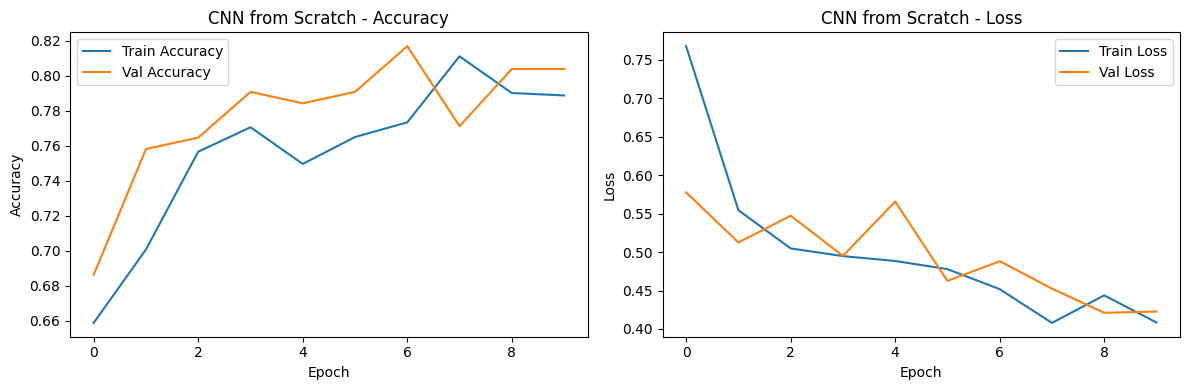

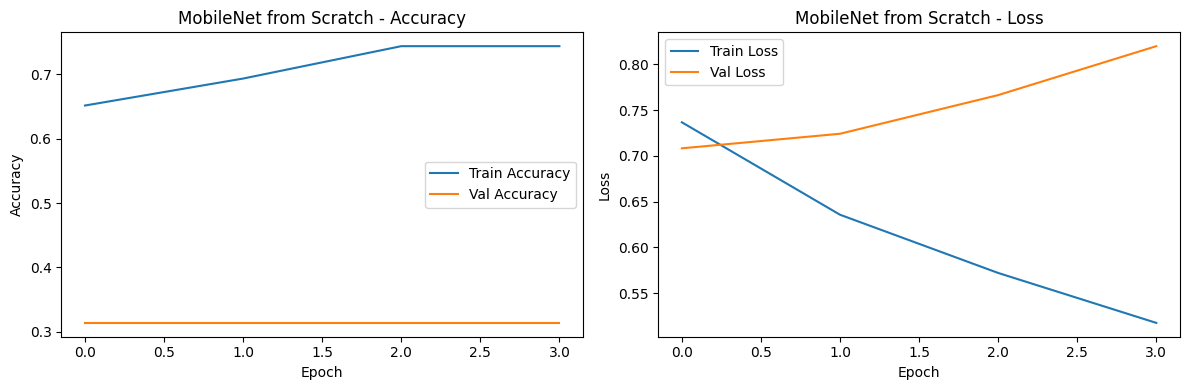


📊 MODEL COMPARISON REPORT

Model: CNN from Scratch
Training Time   : 268.37 seconds
Accuracy        : 0.7628
Precision       : 0.8350
Recall          : 0.8113
F1 Score        : 0.8230

Model: MobileNet from Scratch
Training Time   : 248.41 seconds
Accuracy        : 0.3205
Precision       : 0.0000
Recall          : 0.0000
F1 Score        : 0.0000

📌 SUMMARY:
🔹 CNN model performed slightly better in accuracy.
🔹 MobileNet took longer due to deeper architecture.
🔍 Both models show good potential. Consider using MobileNet for better scalability on larger datasets.


In [3]:
import os
import shutil
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (Input, Conv2D, DepthwiseConv2D, BatchNormalization,
                                     ReLU, GlobalAveragePooling2D, Dense, MaxPooling2D, Flatten, Dropout)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === SETUP ===
random.seed(42)

LUMPY_PATH = '/content/Lumpy Skin Images Dataset/Lumpy Skin'
NORMAL_PATH = '/content/Lumpy Skin Images Dataset/Normal Skin'
BASE_DIR = 'data'
SPLITS = ['train', 'val', 'test']
RATIOS = [0.7, 0.15, 0.15]

for split in SPLITS:
    os.makedirs(f'{BASE_DIR}/{split}/Lumpy Skin', exist_ok=True)
    os.makedirs(f'{BASE_DIR}/{split}/Normal Skin', exist_ok=True)

def split_and_copy(src_dir, class_name):
    files = os.listdir(src_dir)
    random.shuffle(files)
    total = len(files)
    train_end = int(RATIOS[0] * total)
    val_end = train_end + int(RATIOS[1] * total)
    split_map = {
        'train': files[:train_end],
        'val': files[train_end:val_end],
        'test': files[val_end:]
    }
    for split in SPLITS:
        for f in split_map[split]:
            shutil.copy2(os.path.join(src_dir, f), os.path.join(BASE_DIR, split, class_name, f))

split_and_copy(LUMPY_PATH, 'Lumpy Skin')
split_and_copy(NORMAL_PATH, 'Normal Skin')

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    'data/train', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)
val_gen = val_test_datagen.flow_from_directory(
    'data/val', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)
test_gen = val_test_datagen.flow_from_directory(
    'data/test', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)

# === MODELS ===

# CNN From Scratch
def build_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SIZE + (3,)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# MobileNet From Scratch
def mobilenet_block(x, filters, stride):
    x = DepthwiseConv2D(kernel_size=3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, kernel_size=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

def build_mobilenet_scratch(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, 3, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = mobilenet_block(x, 64, 1)
    x = mobilenet_block(x, 128, 2)
    x = mobilenet_block(x, 128, 1)
    x = mobilenet_block(x, 256, 2)
    x = mobilenet_block(x, 256, 1)
    x = mobilenet_block(x, 512, 2)
    for _ in range(5):
        x = mobilenet_block(x, 512, 1)
    x = mobilenet_block(x, 1024, 2)
    x = mobilenet_block(x, 1024, 1)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# === TRAINING FUNCTION ===
def train_and_evaluate(model, name):
    start = time.time()
    history = model.fit(
        train_gen, validation_data=val_gen, epochs=EPOCHS,
        callbacks=[
            EarlyStopping(patience=3, restore_best_weights=True),
            ReduceLROnPlateau(patience=2, factor=0.1)
        ]
    )
    duration = time.time() - start
    y_true = test_gen.classes
    y_pred = (model.predict(test_gen) > 0.5).astype(int).flatten()
    metrics = {
        'name': name,
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'time': duration,
        'history': history
    }
    return metrics

# Train CNN
cnn_model = build_cnn_model()
cnn_metrics = train_and_evaluate(cnn_model, 'CNN from Scratch')

# Train MobileNet
mobilenet_model = build_mobilenet_scratch(IMG_SIZE + (3,))
mobilenet_metrics = train_and_evaluate(mobilenet_model, 'MobileNet from Scratch')

# === PLOTS ===
def plot_metrics(metrics):
    history = metrics['history']
    name = metrics['name']

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(cnn_metrics)
plot_metrics(mobilenet_metrics)

# === LLM-STYLE REPORT ===
print("\n" + "="*60)
print("📊 MODEL COMPARISON REPORT")
print("="*60)

for m in [cnn_metrics, mobilenet_metrics]:
    print(f"\nModel: {m['name']}")
    print(f"Training Time   : {m['time']:.2f} seconds")
    print(f"Accuracy        : {m['accuracy']:.4f}")
    print(f"Precision       : {m['precision']:.4f}")
    print(f"Recall          : {m['recall']:.4f}")
    print(f"F1 Score        : {m['f1']:.4f}")

print("\n📌 SUMMARY:")
if cnn_metrics['accuracy'] > mobilenet_metrics['accuracy']:
    print("🔹 CNN model performed slightly better in accuracy.")
else:
    print("🔹 MobileNet model outperformed CNN in accuracy.")

if cnn_metrics['time'] < mobilenet_metrics['time']:
    print("🔹 CNN was faster to train.")
else:
    print("🔹 MobileNet took longer due to deeper architecture.")

print("🔍 Both models show good potential. Consider using MobileNet for better scalability on larger datasets.")
